<a href="https://colab.research.google.com/github/BrandoSor4/Data-Mining/blob/main/Soriano_Brando_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Import required packages.
2. Get a data file with real estate listings for a town of your choice from redfin.com
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import io


In [ ]:
df= pd.read_csv('redfin_MANHATTAN.csv')
print(df)



                                             SALE TYPE  SOLD DATE  \
0                                          MLS Listing        NaN   
1                                          MLS Listing        NaN   
2                                          MLS Listing        NaN   
3                                          MLS Listing        NaN   
4                                          MLS Listing        NaN   
..                                                 ...        ...   
293                                        MLS Listing        NaN   
294                                        MLS Listing        NaN   
295                                        MLS Listing        NaN   
296                                        MLS Listing        NaN   
297  Local rules require that we limit downloads to...        NaN   

    PROPERTY TYPE                  ADDRESS      CITY STATE OR PROVINCE  \
0     Condo/Co-op  540 W 49th St Unit 509N  New York                NY   
1     Condo/Co-op   225

In [ ]:
df.columns


Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
df = df[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    298 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                297 non-null    object 
 3   ADDRESS                                                                                      289 non-null    object 
 4   CITY                                                                                         294 non-null    object 
 5   STATE OR PROVINCE                   

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

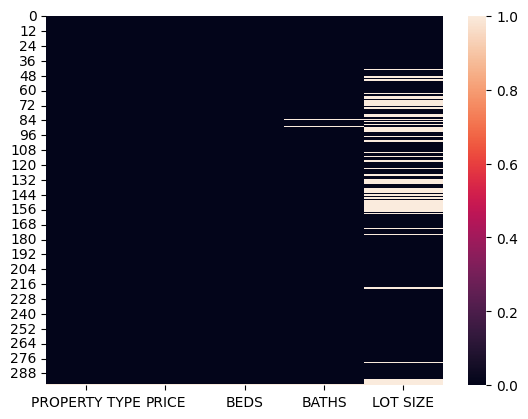

In [ ]:
sns.heatmap(df.isnull(), cbar=True)

<Axes: >

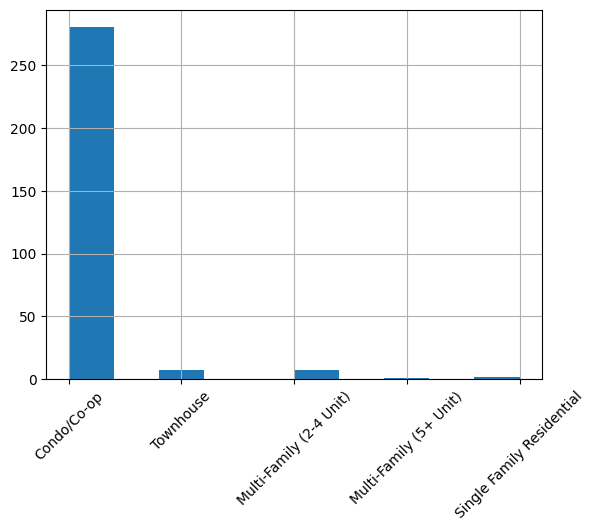

In [ ]:
df['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
df['PROPERTY TYPE'].unique()

array(['Condo/Co-op', 'Townhouse', 'Multi-Family (2-4 Unit)',
       'Multi-Family (5+ Unit)', 'Single Family Residential', nan],
      dtype=object)

In [ ]:
property_types_to_remove = ['Townhouse', 'Multi-Family (2-4 Unit)',
       'Multi-Family (5+ Unit)', 'Single Family Residential']

df.drop(df[df['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.
##I am able to notice a a relationship between bed and baths with price but not lot size. Outliers are very much noticed and need to be adressed
5 pts.

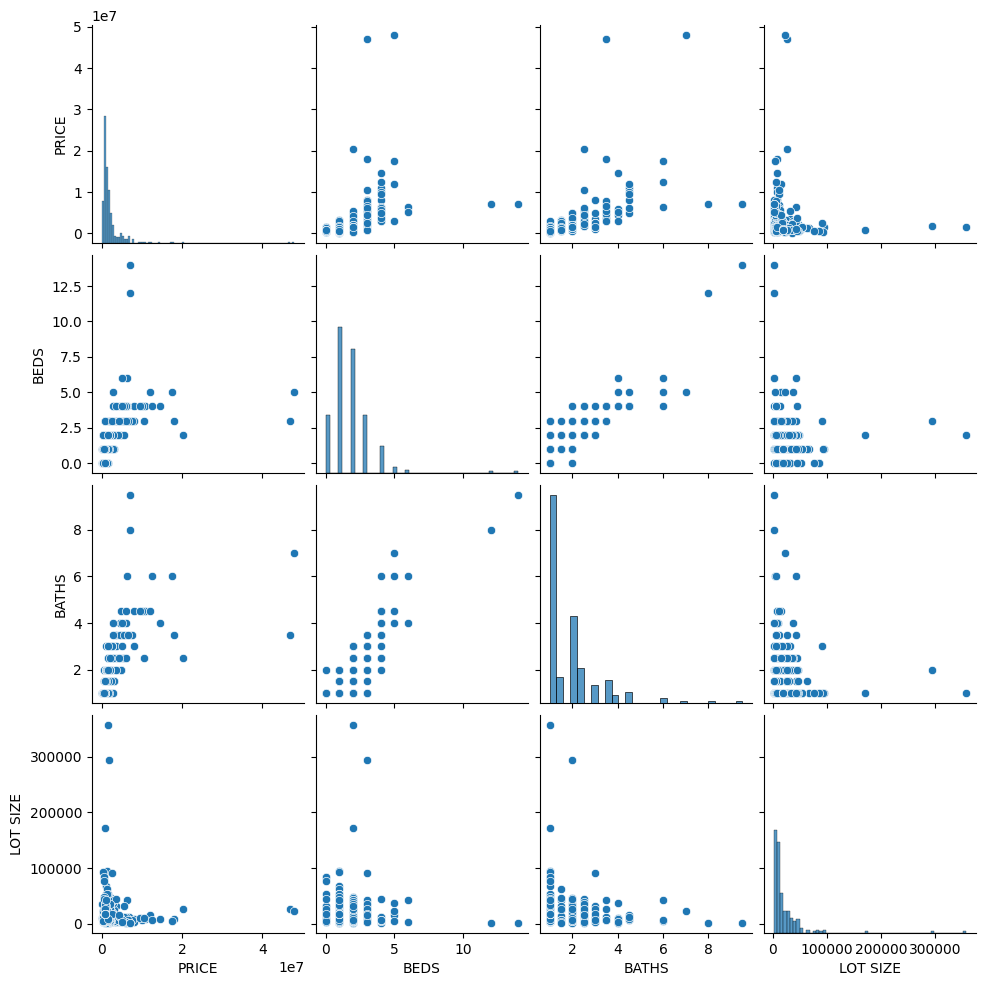

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()


,PRICE,BEDS,BATHS,LOT SIZE
count,2.800000e+02,280.000000,279.000000,223.000000
mean,2.556606e+06,1.800000,1.851254,21506.991031
std,4.731194e+06,1.536649,1.222653,35682.852188
min,1.000000e+04,0.000000,1.000000,1546.000000
25%,7.497500e+05,1.000000,1.000000,6306.000000
50%,1.385000e+06,2.000000,1.500000,10837.000000
75%,2.398750e+06,2.000000,2.000000,24708.000000
max,4.800000e+07,14.000000,9.500000,357935.000000


9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [ ]:
df.drop(df[df['LOT SIZE'] > 100000 ].index, inplace=True)

In [ ]:
imputed = df.fillna(df.mean())

<ipython-input-18-ff548bc23d92>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  imputed = df.fillna(df.mean())


In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE'], dtype='object')

In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,LOT SIZE
count,2.810000e+02,281.000000,281.000000,281.000000
mean,2.556606e+06,1.800000,1.851254,21506.991031
std,4.722738e+06,1.533903,1.218279,31772.912921
min,1.000000e+04,0.000000,1.000000,1546.000000
25%,7.500000e+05,1.000000,1.000000,7900.000000
50%,1.395000e+06,2.000000,1.500000,16067.000000
75%,2.425000e+06,2.000000,2.000000,21506.991031
max,4.800000e+07,14.000000,9.500000,357935.000000


In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'LOT SIZE']

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'LOT SIZE'], dtype='object')

In [ ]:
re_prices.intercept_

-3096584.912000593

In [ ]:
re_prices.coef_

array([-7.30114418e+05,  3.80261412e+06,  4.72521196e+00])

In [ ]:
train_X.head()

,BEDS,BATHS,LOT SIZE
63,3.0,2.5,9154.0
120,0.0,1.0,15777.0
222,0.0,1.0,76300.0
160,2.0,2.0,3872.0
56,0.0,1.0,8611.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  -0.4365145435591393
MAE:  1643545.7957485532
RMSE:  2842852.8624164276
Max error:  15815979.721436627


## This regression model is not acceptable for practitioners and should stay far away from them, unless they want a model that can have a 15.8 million dollar maximum error.